In [41]:
# Data Collection & Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Configure display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
print("Libraries imported successfully!")

Libraries imported successfully!


In [42]:
# Load student-mat.csv and student-por.csv
mat = pd.read_csv(r"C:\Users\Chandana N\PycharmProjects\studyTrack_AI_StudentRecommender\Milestone1\data\student-mat.csv", sep=';')
por = pd.read_csv(r"C:\Users\Chandana N\PycharmProjects\studyTrack_AI_StudentRecommender\Milestone1\data\student-por.csv", sep=';')
print(" Datasets Loaded Successfully!")
print("\nMath dataset shape:", mat.shape)
print("Portuguese dataset shape:", por.shape)
# Preview both
display(mat.head(2))
display(por.head(2))

 Datasets Loaded Successfully!

Math dataset shape: (395, 33)
Portuguese dataset shape: (649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11


In [43]:
# Merge datasets on common student info
common_columns = [
    'school','sex','age','address','famsize','Pstatus',
    'Medu','Fedu','Mjob','Fjob','reason','guardian'
]
# Merge both based on these columns
combined_df = pd.merge(mat, por, on=common_columns, suffixes=('_math', '_por'))
print("Combined dataset created successfully!")
print("Combined shape:", combined_df.shape)
combined_df.head()

Combined dataset created successfully!
Combined shape: (383, 54)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime_math,studytime_math,failures_math,schoolsup_math,famsup_math,paid_math,activities_math,nursery_math,higher_math,internet_math,romantic_math,famrel_math,freetime_math,goout_math,Dalc_math,Walc_math,health_math,absences_math,G1_math,G2_math,G3_math,traveltime_por,studytime_por,failures_por,schoolsup_por,famsup_por,paid_por,activities_por,nursery_por,higher_por,internet_por,romantic_por,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [44]:
# Info + missing + duplicates
print("Dataset Info:")
print(combined_df.info())
print("\n Missing values per column:")
print(combined_df.isnull().sum())
# Drop duplicates
combined_df = combined_df.drop_duplicates().reset_index(drop=True)
print("\n Duplicates removed. Total rows:", len(combined_df))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   school           383 non-null    object
 1   sex              383 non-null    object
 2   age              383 non-null    int64 
 3   address          383 non-null    object
 4   famsize          383 non-null    object
 5   Pstatus          383 non-null    object
 6   Medu             383 non-null    int64 
 7   Fedu             383 non-null    int64 
 8   Mjob             383 non-null    object
 9   Fjob             383 non-null    object
 10  reason           383 non-null    object
 11  guardian         383 non-null    object
 12  traveltime_math  383 non-null    int64 
 13  studytime_math   383 non-null    int64 
 14  failures_math    383 non-null    int64 
 15  schoolsup_math   383 non-null    object
 16  famsup_math      383 non-null    object
 17  paid_math        383 

In [45]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cat_cols = combined_df.select_dtypes(include=['object']).columns
for col in cat_cols:
    combined_df[col] = encoder.fit_transform(combined_df[col])
print("All categorical columns encoded successfully!")
combined_df.head()

All categorical columns encoded successfully!


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime_math,studytime_math,failures_math,schoolsup_math,famsup_math,paid_math,activities_math,nursery_math,higher_math,internet_math,romantic_math,famrel_math,freetime_math,goout_math,Dalc_math,Walc_math,health_math,absences_math,G1_math,G2_math,G3_math,traveltime_por,studytime_por,failures_por,schoolsup_por,famsup_por,paid_por,activities_por,nursery_por,higher_por,internet_por,romantic_por,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13


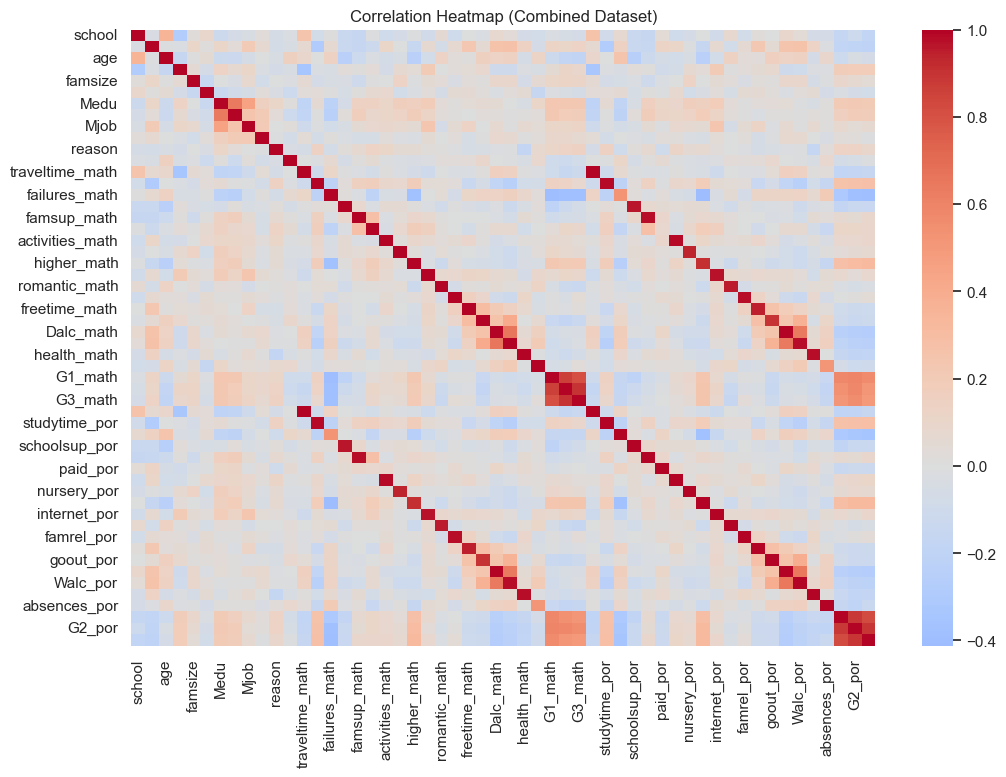

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(combined_df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Combined Dataset)")
plt.show()

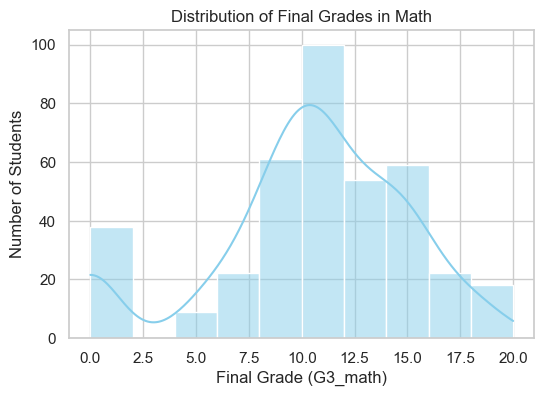

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(combined_df['G3_math'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Final Grades in Math')
plt.xlabel('Final Grade (G3_math)')
plt.ylabel('Number of Students')
plt.show()

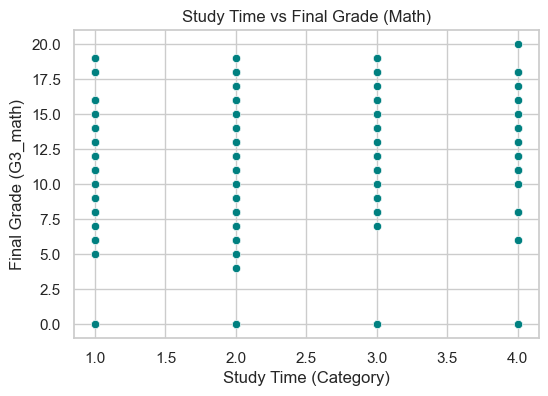

In [48]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='studytime_math', y='G3_math', data=combined_df, color='teal')
plt.title('Study Time vs Final Grade (Math)')
plt.xlabel('Study Time (Category)')
plt.ylabel('Final Grade (G3_math)')
plt.show()

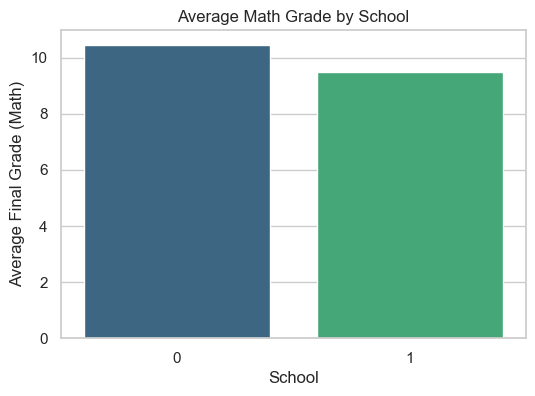

In [49]:
plt.figure(figsize=(6,4))
sns.barplot(x='school', y='G3_math', hue='school', data=combined_df, errorbar=None, palette='viridis', legend=False)
plt.title('Average Math Grade by School')
plt.xlabel('School')
plt.ylabel('Average Final Grade (Math)')
plt.show()